In [ ]:
from IPython.display import Image
from openpyxl import load_workbook #used to import the Excel Data
from mailmerge import MailMerge

Reference: <br>
https://pbpython.com/python-word-template.html


MailMerge Example: <br>
https://answers.microsoft.com/en-us/msoffice/forum/all/mail-merge-is-an-if-then-symbol-possible/0d19a5da-856f-4466-90a6-f7cf6a668339

Marking Merge Fields:
- Key command
> On windows: Ctrl-F9 <br>
>Mac: Cmd-F9 on a Mac <br>
>Once this is done, input MERGEFIELD, as such:
>`{MERGEFIELD Name}`

- Using Word.
>Under <b>Insert</b>, go to 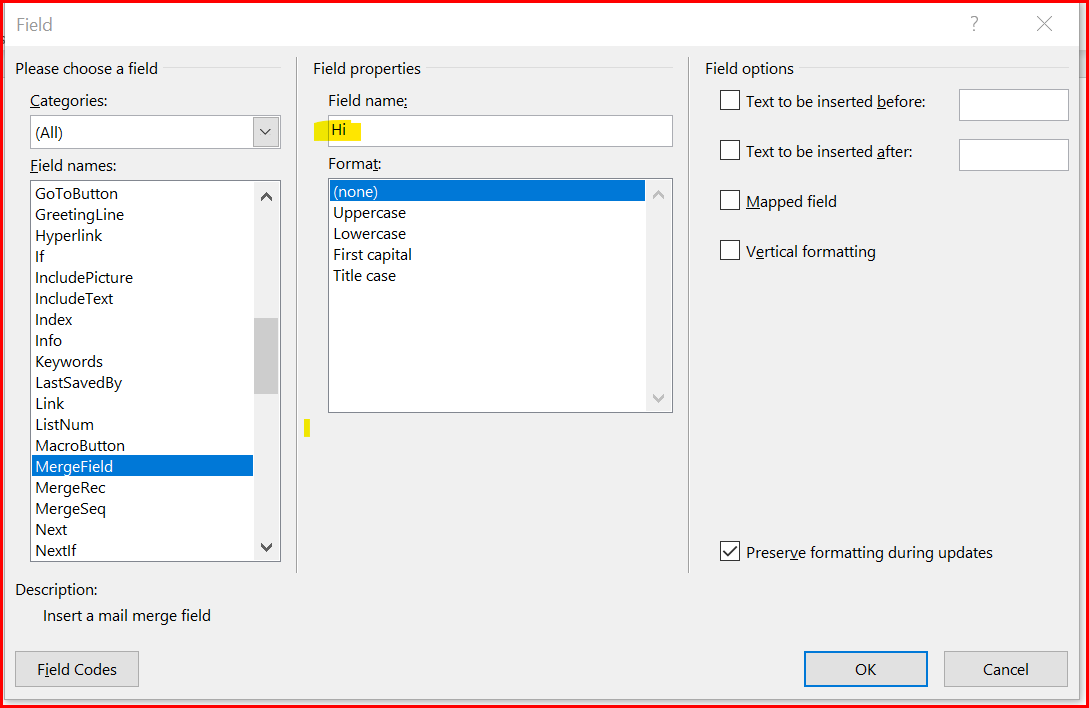<b>Field</b> under the <b>Quick Parts</b> button
>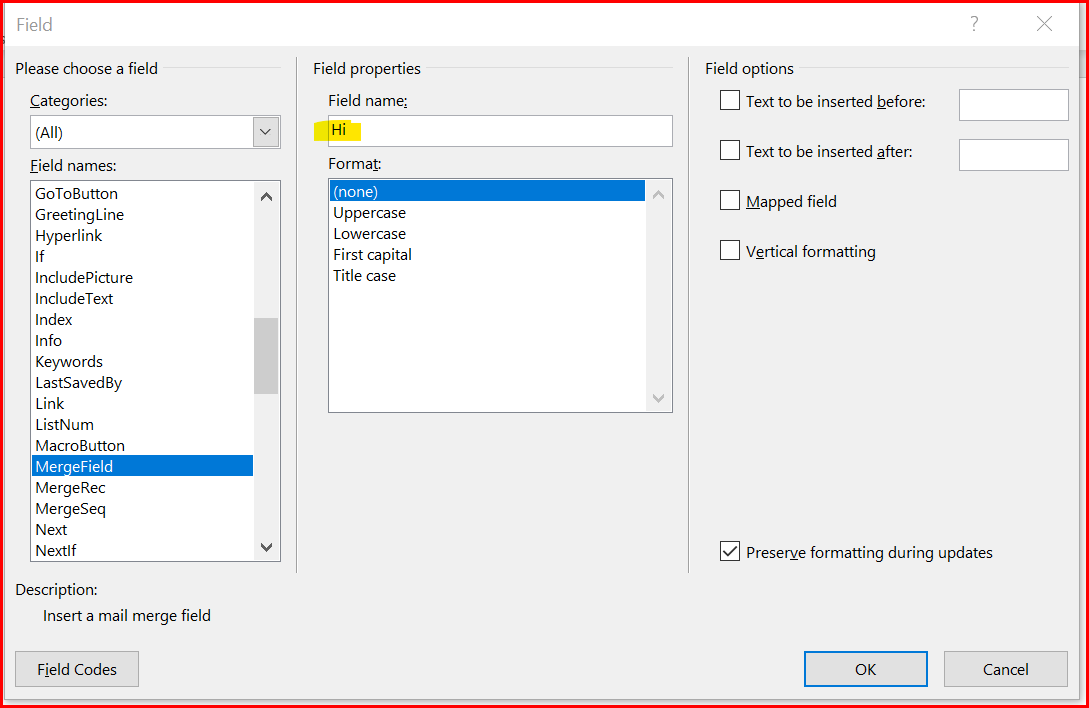
> <br>
>In the <b>Field window</b>, select <b>Merge Field</b> in the field names and input the name of the field in the <b>Field Name</b> text box
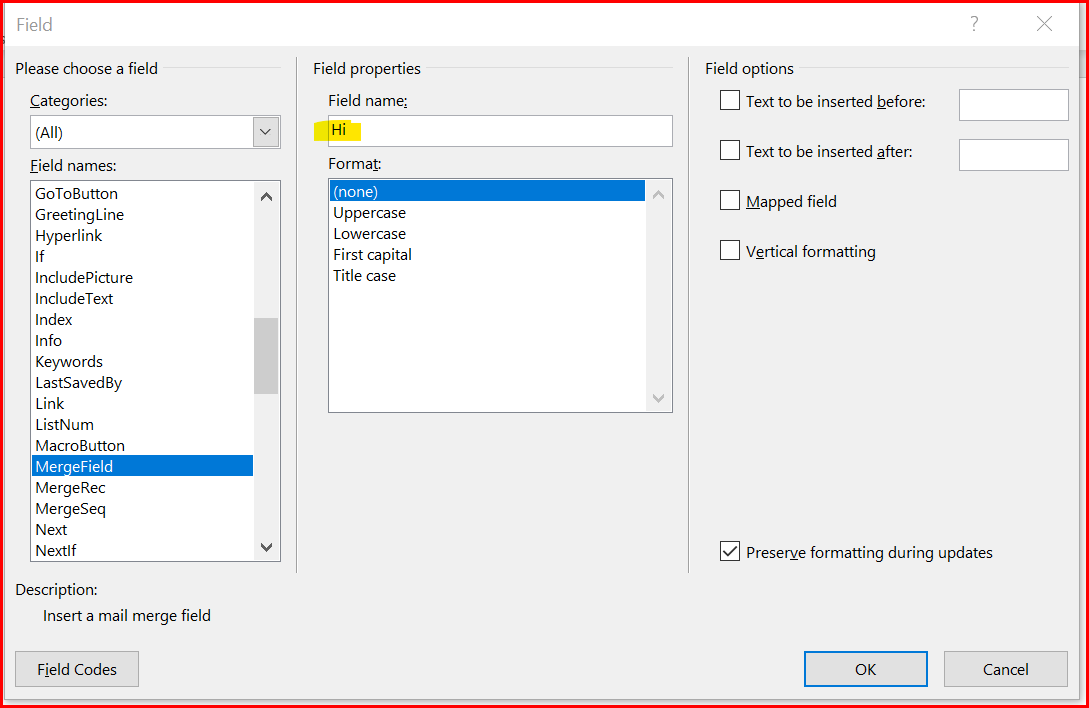

>Once down, it will look like this:
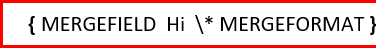

## Writing the single line fields

In [ ]:
wb = load_workbook('SampleData.xlsx') #open excel workbook
sheet = wb['SalesOrders'] #Tab to get information
max_row = sheet.max_row #count of all of the rows

In [ ]:
# Testing
template_doc = "OrderTemplate.docx" #word dock
word_doc = MailMerge(template_doc)

word_doc.get_merge_fields()

## Test: creating document with one product line

In [ ]:
# for i in range(1, max_row):
for i in range(2, 4): #just interating 3 for testing
    template_doc = "OrderTemplate.docx" #word dock
    word_doc = MailMerge(template_doc)

    word_doc.merge(
        Name = str(sheet.cell(row = i, column = 3).value),
        Date = str(sheet.cell(row = i, column = 1).value),
        Quantity = str(sheet.cell(row = i, column = 5).value),
        Cost = str(sheet.cell(row = i, column = 6).value),
        Subtotal = str(sheet.cell(row = i, column = 7).value)
        )

    word_doc.write("Invoice for " + str(sheet.cell(row = i, column = 3).value) + ".docx")

## Getting all the recipients

In [ ]:
# Initial setup
max_row = sheet.max_row
rep_col = 3
rep_list = []

# Looping though data, skipping first line as it is the labels
for cell_row in range(2 , max_row+1):
    rep = sheet.cell(row = cell_row, column = rep_col).value
    rep_list.append(rep)

In [ ]:
# Getting the distinct list of reps
unique_rep_list = list(set(rep_list))
unique_rep_list

In [ ]:
# If there is a NaN in the unique list, will remove it
if None in unique_rep_list:
    unique_rep_list.remove(None)

In [ ]:
# List without None
unique_rep_list

## inputting data into sales_history dict

Testing output of sales history

In [ ]:
for item in sales_history_test:
    print(item)

Testing appending dictionary to list <br>
This will be the process for appending each reps sales order for each <br> 
sales order/ invoice

In [ ]:
test_dict = {'a' : 1, 'b' : 'word'}
test_list = []

In [ ]:
test_list.append(test_dict)
test_list

In [ ]:
sales_history_test = []

In [ ]:
max_row = sheet.max_row
# rep_list = []
# sales_history_list = []

for rep in unique_rep_list:
    sales_history_list = []
    for cell_row in range(2 , max_row+1):
        #looping to check the current rep in spreadsheet
        current_rep = sheet.cell(row = cell_row, column = 3).value
        
        #Checking to see if line item is for rep
        if current_rep == rep:
            
            #Appending product as a dict into a list, which will be merged as a table
            product_dict = {
                'Date' : str(sheet.cell(row = cell_row, column = 1).value),
                'Item' : str(sheet.cell(row = cell_row, column = 4).value),
                'Quantity' : str(sheet.cell(row = cell_row, column = 5).value),
                'Cost' : str(sheet.cell(row = cell_row, column = 6).value),
                'Subtotal' : str(sheet.cell(row = cell_row, column = 7).value)
            }
            sales_history_list.append(product_dict)
            
    # Code in merge
    # Looping through to calculate total
    total = 0
    for trans in sales_history_list:
        total += float(trans['Subtotal'])

    # Merging the name    
    word_doc.merge(
        Name = rep,
        Total = "{:,.2f}".format(total)
        )

    word_doc.merge_rows('Date', sales_history_list)
    word_doc.write(f'Invoice for {rep}.docx')
            

In [ ]:
# for i in range(1, max_row):
for i in range(2, 4): #just interating 3 for testing
    template_doc = "OrderTemplate.docx" #word dock
    word_doc = MailMerge(template_doc)

    word_doc.merge(
        Name = str(sheet.cell(row = i, column = 3).value),
        Date = str(sheet.cell(row = i, column = 1).value),
        Quantity = str(sheet.cell(row = i, column = 5).value),
        Cost = str(sheet.cell(row = i, column = 6).value),
        Subtotal = str(sheet.cell(row = i, column = 7).value)
        )

    word_doc.write("Invoice for " + str(sheet.cell(row = i, column = 3).value) + ".docx")

## Inserting a table of data

In [ ]:
# Todo: Come up with way to populate this field dynamically
sales_history_test = [
    { 'Date': 'Red Shoes','Item': 'Red Shoes','Quantity': '$10.00','Cost': '2500','Subtotal': '25000'},
    { 'Date': 'Red Shoes','Item': 'Red Shoes','Quantity': '$10.00','Cost': '2500','Subtotal': '25000'}, 
    { 'Date': 'Red Shoes','Item': 'Red Shoes','Quantity': '$10.00','Cost': '2500','Subtotal': '25000'}
]

In [ ]:
# Setting the name of the recipient
i = 2 #to simulate a loop
receiver = str(sheet.cell(row = i, column = 3).value)

# loading in word doc template
template_doc = "OrderTemplate.docx" #word dock
word_doc = MailMerge(template_doc)


# Looping through to calculate total
total = 0
for trans in sales_history:
    total += float(trans['Subtotal'])
    
# Merging the name    
word_doc.merge(
    Name = receiver,
    Total = "{:,.2f}".format(total)
    )

word_doc.merge_rows('Date', sales_history)
word_doc.write(f'Invoice for {receiver}.docx')

## Testing concepts

### Testing float conversion

In [ ]:
# float('25.01') #works
# float('$25.01') #doesn't work
# float('25,000') # float('25.01') #works
# float('$25.01') #doesn't work
# float('25,000') #doesn't
# float('25,000'.replace(',','')) #works
# "{:.2f}".format(25.00)#works, convert as a string, formatted as two decimal number
"{:,.2f}".format(25000)#works, convert as a string, formatted as two decimal number and commas

### Retrieving dict items


In [ ]:
total = 0
for trans in sales_history:
    total += float(trans['Subtotal'])
total

## Datetime

In [1]:
from datetime import datetime

here = '8/15/2019'

# convert string into datetime
datetime.strptime(here, '%m/%d/%Y')
print(here)

# now = datetime.now() # current date and time
# print(now)
# type(now)
# date_time = now.strftime("%m/%d/%Y")
# date_time = here.strftime("%m/%d/%Y")
print("This is the date_time: " + type(date_time))
# now


8/15/2019


AttributeError: 'str' object has no attribute 'strftime'

# Coding sample

In [2]:
from IPython.display import Image
from openpyxl import load_workbook #used to import the Excel Data
from mailmerge import MailMerge

# Setting up Excel sheet variables
wb = load_workbook('SampleData.xlsx') #open excel workbook
sheet = wb['SalesOrders'] #Tab to get information
max_row = sheet.max_row #count of all of the rows

# Getting Unique reps. Need to make each of their reports
rep_list = []
for cell_row in range(2 , max_row+1):
    rep = sheet.cell(row = cell_row, column = 3).value
    rep_list.append(rep)
unique_rep_list = list(set(rep_list)) #getting unique list of reps

for rep in unique_rep_list:
    sales_history_list = []
    
    # Setting up Word document variables. Need to reuse template for each rep
    template_doc = "OrderTemplate.docx"
    word_doc = MailMerge(template_doc)    

    for cell_row in range(2 , max_row+1):
        #looping to check the current rep in spreadsheet
        current_rep = sheet.cell(row = cell_row, column = 3).value

        #Checking to see if line item is for rep
        if current_rep == rep:

            #Appending product as a dict into a list, which will be merged as a table
            product_dict = {
            'Date' : str(sheet.cell(row = cell_row, column = 1).value),
            'Item' : str(sheet.cell(row = cell_row, column = 4).value),
            'Quantity' : str(sheet.cell(row = cell_row, column = 5).value),
            'Cost' : str(sheet.cell(row = cell_row, column = 6).value),
            'Subtotal' : str(sheet.cell(row = cell_row, column = 7).value)
            }

            sales_history_list.append(product_dict)

    # Code in merge
    # Looping through to calculate total
    total = 0
    for trans in sales_history_list:
        total += float(trans['Subtotal'])

    # Merging the name    
    word_doc.merge(
    Name = rep,
    Total = "{:,.2f}".format(total)
    )

    word_doc.merge_rows('Date', sales_history_list)
    word_doc.write(f'Invoice for {rep}.docx')
            